# Task-1 : Use classification technique for prediction of Graduate Admissions from an Indian perspective

In [50]:
#Import required libeares

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
df=pd.read_csv("Admission_Predict_Ver1.1.csv")

In [52]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [53]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [54]:
df.shape

(500, 9)

In [55]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [57]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [58]:
df = df.rename(columns={'Chance of Admit ':'ChanceofAdmit'})

In [59]:
df.nunique()

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
ChanceofAdmit         61
dtype: int64

In [60]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
ChanceofAdmit        0
dtype: int64

In [61]:
df.duplicated().sum()

0

In [62]:
df.drop("Serial No.",axis=1,inplace=True)

In [63]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,ChanceofAdmit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


# Data Visualization

#UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='University Rating', ylabel='count'>

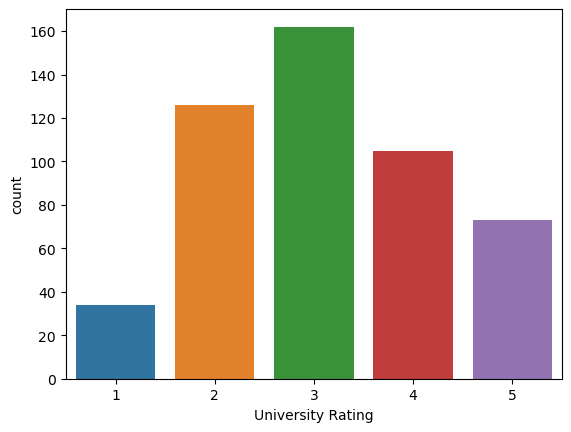

In [64]:
sns.countplot(data=df,x='University Rating')

<AxesSubplot:xlabel='Research', ylabel='count'>

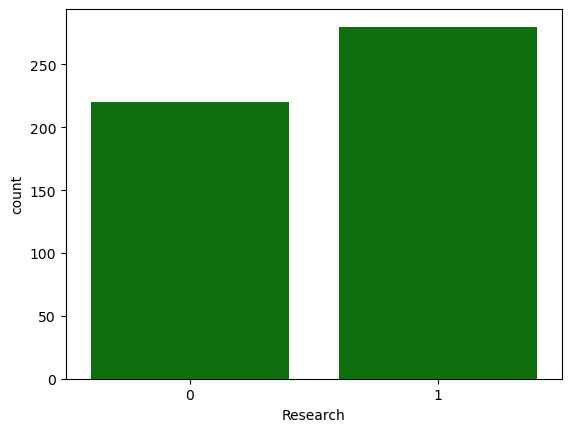

In [65]:
sns.countplot(data=df,x='Research',color='green')

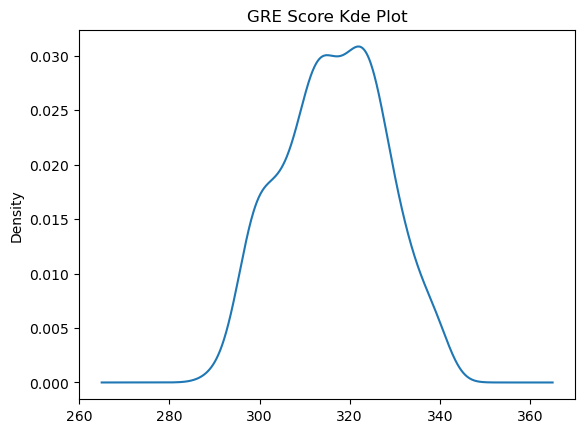

In [66]:
df['GRE Score'].plot(kind='kde', title="GRE Score Kde Plot")
plt.show()

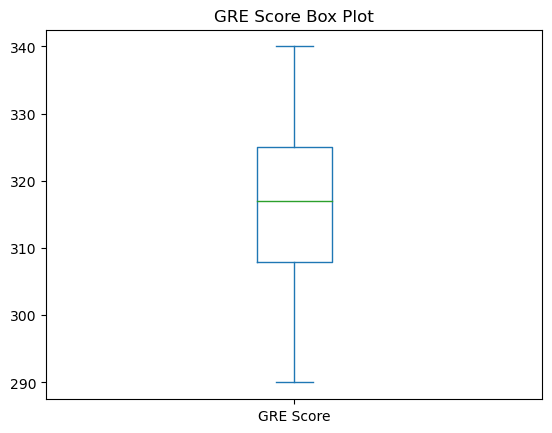

In [67]:
df['GRE Score'].plot(kind='box', title="GRE Score Box Plot")
plt.show()

In [68]:
print("Minimum GRE Score : ", df['GRE Score'].min())
print("Maximum GRE Score : ", df['GRE Score'].max())
print("Average GRE Score : ", df['GRE Score'].mean())
print("Std GRE Score : ", df['GRE Score'].std())

Minimum GRE Score :  290
Maximum GRE Score :  340
Average GRE Score :  316.472
Std GRE Score :  11.295148372354694


In [69]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,ChanceofAdmit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


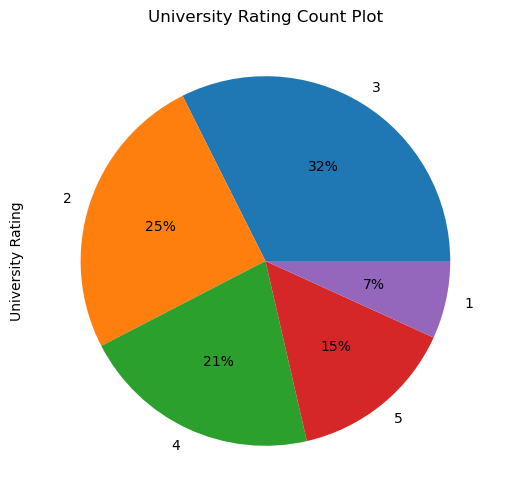

In [70]:
df['University Rating'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(8,6),
                                            title="University Rating Count Plot")
plt.show()

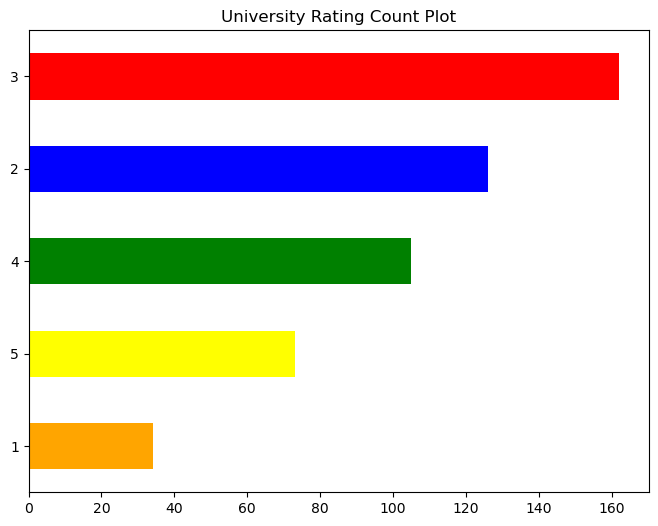

In [71]:
df['University Rating'].value_counts().sort_values().plot(kind='barh',figsize=(8,6),
                                            title="University Rating Count Plot",
                                                          color=["orange","yellow","green","blue","red"])
plt.show()

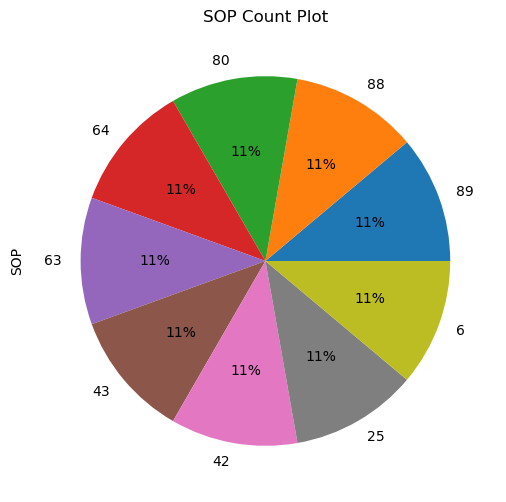

In [72]:
df.SOP.value_counts().value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(8,6),
                                            title="SOP Count Plot")
plt.show()

# BIVARIATE ANALYSIS

In [73]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,ChanceofAdmit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


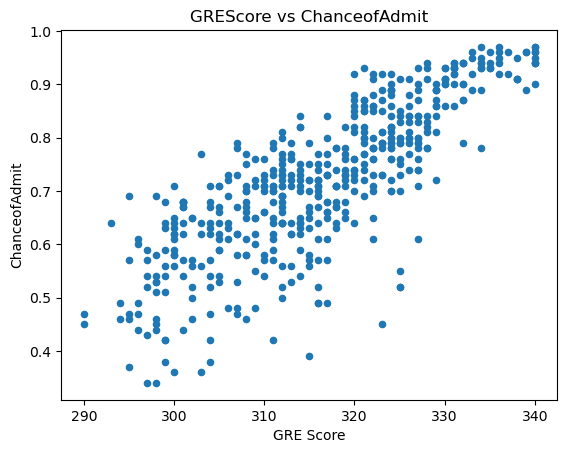

In [74]:
df.plot(kind="scatter", x='GRE Score', y = 'ChanceofAdmit', title="GREScore vs ChanceofAdmit")
plt.show()

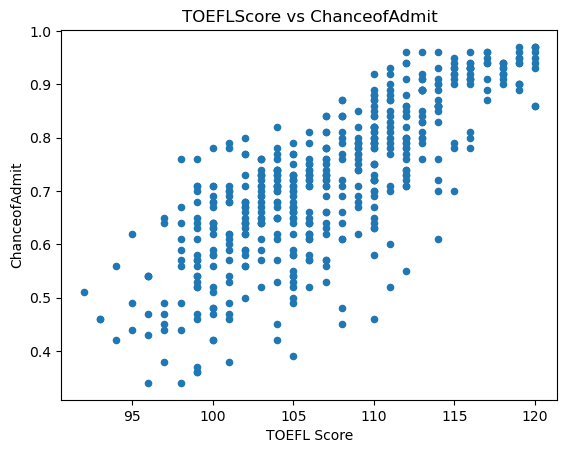

In [75]:
df.plot(kind="scatter", x='TOEFL Score', y = 'ChanceofAdmit' , title="TOEFLScore vs ChanceofAdmit")
plt.show()

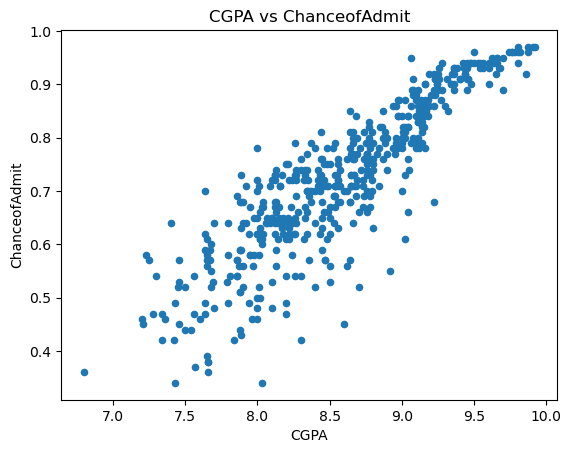

In [76]:
df.plot(kind="scatter", x='CGPA', y = 'ChanceofAdmit', title="CGPA vs ChanceofAdmit")
plt.show()

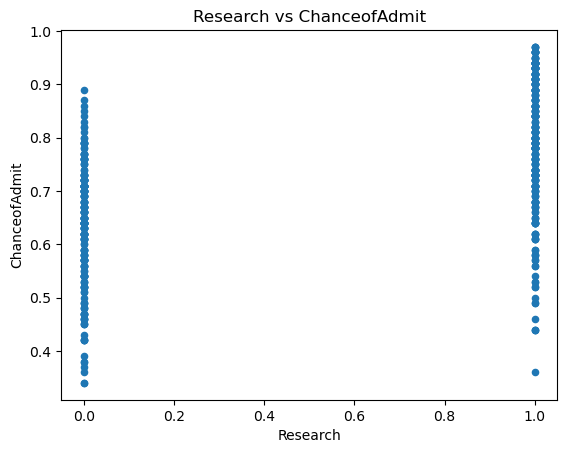

In [77]:
df.plot(kind="scatter", x='Research', y = 'ChanceofAdmit', title="Research vs ChanceofAdmit")
plt.show()

<AxesSubplot:>

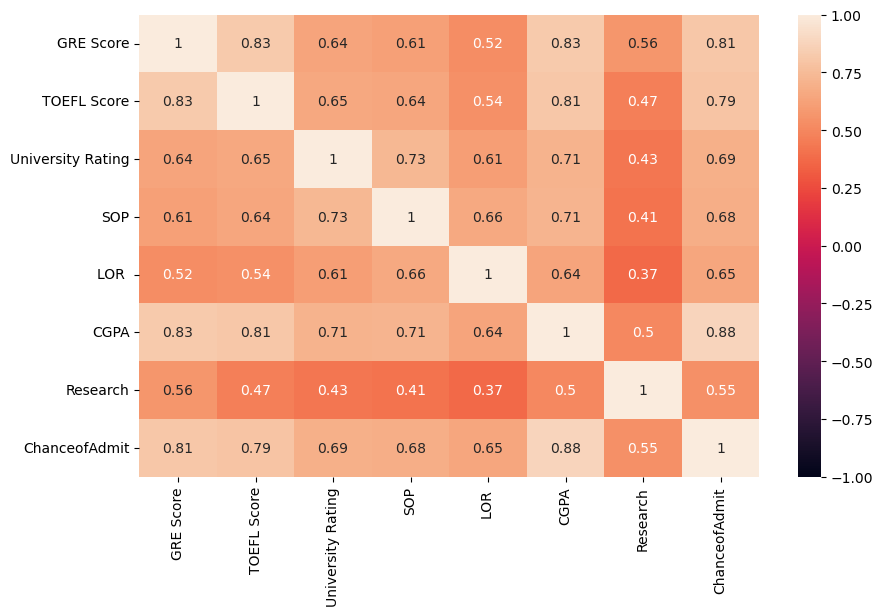

In [78]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1)

# Splitting Data

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X=df.drop("ChanceofAdmit",axis=1)
y=df["ChanceofAdmit"]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [82]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
249,321,111,3,3.5,4.0,8.83,1
433,316,111,4,4.0,5.0,8.54,0
19,303,102,3,3.5,3.0,8.50,0
322,314,107,2,2.5,4.0,8.27,0
332,308,106,3,3.5,2.5,8.21,1
...,...,...,...,...,...,...,...
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0
435,309,105,2,2.5,4.0,7.68,0


In [83]:
y_train

249    0.77
433    0.71
19     0.62
322    0.72
332    0.75
       ... 
106    0.87
270    0.72
348    0.57
435    0.55
102    0.62
Name: ChanceofAdmit, Length: 400, dtype: float64

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error

In [85]:
scaler = StandardScaler()

In [86]:
X_train = scaler.fit_transform(X_train)

In [87]:
X_train

array([[ 0.38998634,  0.6024183 , -0.09829757, ...,  0.56498381,
         0.4150183 ,  0.89543386],
       [-0.06640493,  0.6024183 ,  0.7754586 , ...,  1.65149114,
        -0.06785154, -1.11677706],
       [-1.25302222, -0.87691722, -0.09829757, ..., -0.52152352,
        -0.13445427, -1.11677706],
       ...,
       [-1.34430047, -1.37002906, -1.8458099 , ..., -1.60803084,
        -2.2157898 , -1.11677706],
       [-0.7053527 , -0.38380538, -0.97205374, ...,  0.56498381,
        -1.49981038, -1.11677706],
       [-0.24896144, -0.21943477, -0.97205374, ...,  0.02173015,
        -0.55072138, -1.11677706]])

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
lr = LinearRegression()

In [90]:
lr.fit(X_train, y_train)

LinearRegression()

In [91]:
y_pred = lr.predict(X_test)

In [92]:
r2_score(y_test, y_pred)

-5949.36092395481

In [101]:
import joblib

In [102]:
joblib.dump(lr, 'lr.pkl')

['lr.pkl']

In [103]:
# Thank You...!